In [5]:
from tensorflow.keras import backend as K

def clear_memory():
    K.clear_session()
    tf.compat.v1.reset_default_graph()

In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  2


In [7]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Lambda
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

# Ensure reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Directories for normal and misbehavior images
normal_dir = '/home/UFAD/mohitkukreja/Documents/data_perfect_driving/images'
blurry_dir = '/home/UFAD/mohitkukreja/Documents/data_perfect_driving/images_blurred'
dirt_dir = '/home/UFAD/mohitkukreja/Documents/data_perfect_driving/images_dirt/'
tape_dir = '/home/UFAD/mohitkukreja/Documents/data_perfect_driving/images_tape/'

In [4]:
# Load and preprocess images
def load_and_preprocess_images(folder_path, num_images, target_size=(128, 128)):
    images = []
    count = 0
    for filename in os.listdir(folder_path):
        if count >= num_images:
            break
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img)
            img_array = img_array / 255.0  # Normalize images to [0, 1]
            images.append(img_array)
            count += 1
    return np.array(images)

In [5]:
normal_images = load_and_preprocess_images(normal_dir, num_images=5000, target_size=(128, 128))
blurry_images = load_and_preprocess_images(blurry_dir, num_images=500, target_size=(128, 128))

# Check if normal_images and blurry_images are numpy arrays
print(f"Normal images type: {type(normal_images)}")
print(f"Blurry images type: {type(blurry_images)}")

# Check the shape of the normal and blurry image datasets
print(f"Normal images shape: {normal_images.shape}")
print(f"Blurry images shape: {blurry_images.shape}")

Normal images type: <class 'numpy.ndarray'>
Blurry images type: <class 'numpy.ndarray'>
Normal images shape: (5000, 128, 128, 3)
Blurry images shape: (500, 128, 128, 3)


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 flatten (Flatten)           (None, 49152)                0         ['input_1[0][0]']             
                                                                                                  
 dense (Dense)               (None, 256)                  1258316   ['flatten[0][0]']             
                                                          8                                       
                                                                                                  
 dense_1 (Dense)             (None, 128)                  32896     ['dense[0][0]']         

 pLambda)                                                                                         
                                                                                                  
 tf.math.reduce_mean (TFOpL  ()                           0         ['tf.math.reduce_sum[0][0]']  
 ambda)                                                                                           
                                                                                                  
 tf.math.multiply (TFOpLamb  ()                           0         ['tf.math.reduce_mean_1[0][0]'
 da)                                                                ]                             
                                                                                                  
 tf.__operators__.add_1 (TF  ()                           0         ['tf.math.reduce_mean[0][0]', 
 OpLambda)                                                           'tf.math.multiply[0][0]']    
          

2024-12-19 07:50:11.154289: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22316 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:31:00.0, compute capability: 8.6
2024-12-19 07:50:11.155964: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22350 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:b1:00.0, compute capability: 8.6


Epoch 1/50


2024-12-19 07:50:13.919320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-12-19 07:50:13.964620: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xbc38690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-19 07:50:13.964650: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-12-19 07:50:13.964655: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-12-19 07:50:13.969709: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-19 07:50:13.986151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-12-19 07:50

79/79 [==============================] - 3s 5ms/step - loss: 614.1588
Epoch 2/50
79/79 [==============================] - 0s 5ms/step - loss: 457.7086
Epoch 3/50
79/79 [==============================] - 0s 5ms/step - loss: 435.4240
Epoch 4/50
79/79 [==============================] - 0s 5ms/step - loss: 383.4056
Epoch 5/50
79/79 [==============================] - 0s 5ms/step - loss: 359.5003
Epoch 6/50
79/79 [==============================] - 0s 5ms/step - loss: 355.4215
Epoch 7/50
79/79 [==============================] - 0s 5ms/step - loss: 342.3867
Epoch 8/50
79/79 [==============================] - 0s 5ms/step - loss: 343.3116
Epoch 9/50
79/79 [==============================] - 0s 5ms/step - loss: 337.1792
Epoch 10/50
79/79 [==============================] - 0s 5ms/step - loss: 338.0412
Epoch 11/50
79/79 [==============================] - 0s 5ms/step - loss: 330.2485
Epoch 12/50
79/79 [==============================] - 0s 5ms/step - loss: 321.5069
Epoch 13/50
79/79 [=================

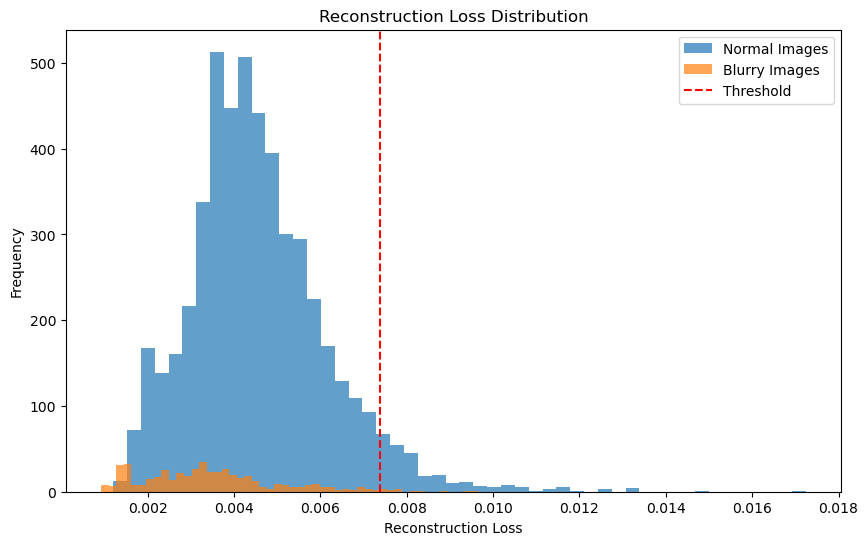

In [6]:
# Train the VAE only on normal images
train_images = normal_images

# Variational Autoencoder (VAE)
input_shape = (128, 128, 3)
latent_dim = 2

# Encoder model
inputs = Input(shape=input_shape)
x = Flatten()(inputs)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)


def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = z_mean.shape[1]
    epsilon = tf.random.normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon


z = Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])

encoder = Model(inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# Decoder model
latent_inputs = Input(shape=(latent_dim,), name="z_sampling")
x = Dense(128, activation="relu")(latent_inputs)
x = Dense(256, activation="relu")(x)
x = Dense(np.prod(input_shape), activation="sigmoid")(x)
outputs = Reshape(input_shape)(x)

decoder = Model(latent_inputs, outputs, name="decoder")
decoder.summary()

# VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name="vae")

# VAE loss
reconstruction_loss = tf.reduce_mean(tf.reduce_sum(tf.square(inputs - outputs), axis=[1, 2, 3]))
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(kl_loss, axis=-1))
vae_loss = reconstruction_loss + kl_loss
vae.add_loss(vae_loss)

# Compile the VAE
vae.compile(optimizer="adam")
vae.summary()

# Train the VAE
vae.fit(train_images, train_images, epochs=50, batch_size=64, shuffle=True)

# Evaluate on blurry images
reconstructed_blurry = vae.predict(blurry_images)
blurry_reconstruction_loss = np.mean(np.square(blurry_images - reconstructed_blurry), axis=(1, 2, 3))

# Evaluate on normal images
reconstructed_normal = vae.predict(normal_images)
normal_reconstruction_loss = np.mean(np.square(normal_images - reconstructed_normal), axis=(1, 2, 3))

# Set a threshold based on normal reconstruction loss
threshold = np.percentile(normal_reconstruction_loss, 95)

# Classify blurry images
blurry_classification = blurry_reconstruction_loss > threshold
correctly_classified_blurry = np.sum(blurry_classification)
misclassified_as_normal = len(blurry_classification) - correctly_classified_blurry

# Print results
print(f"Threshold for anomaly detection: {threshold:.4f}")
print(f"Number of blurry images correctly classified as blurry: {correctly_classified_blurry}")
print(f"Number of blurry images misclassified as normal: {misclassified_as_normal}")

# Plot reconstruction loss
plt.figure(figsize=(10, 6))
plt.hist(normal_reconstruction_loss, bins=50, alpha=0.7, label="Normal Images")
plt.hist(blurry_reconstruction_loss, bins=50, alpha=0.7, label="Blurry Images")
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.title("Reconstruction Loss Distribution")
plt.xlabel("Reconstruction Loss")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Epoch 1/50


2024-12-19 08:47:30.585186: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


329/329 [==============================] - 6s 12ms/step - loss: 122.4183
Epoch 2/50
329/329 [==============================] - 4s 11ms/step - loss: 69.1863
Epoch 3/50
329/329 [==============================] - 4s 11ms/step - loss: 57.7694
Epoch 4/50
329/329 [==============================] - 4s 11ms/step - loss: 52.8809
Epoch 5/50
329/329 [==============================] - 4s 11ms/step - loss: 50.0829
Epoch 6/50
329/329 [==============================] - 4s 11ms/step - loss: 48.2051
Epoch 7/50
329/329 [==============================] - 4s 11ms/step - loss: 46.7778
Epoch 8/50
329/329 [==============================] - 4s 11ms/step - loss: 45.5501
Epoch 9/50
329/329 [==============================] - 4s 11ms/step - loss: 44.8599
Epoch 10/50
329/329 [==============================] - 4s 11ms/step - loss: 43.7487
Epoch 11/50
329/329 [==============================] - 4s 11ms/step - loss: 43.3161
Epoch 12/50
329/329 [==============================] - 4s 11ms/step - loss: 42.7249
Epoch 13/50

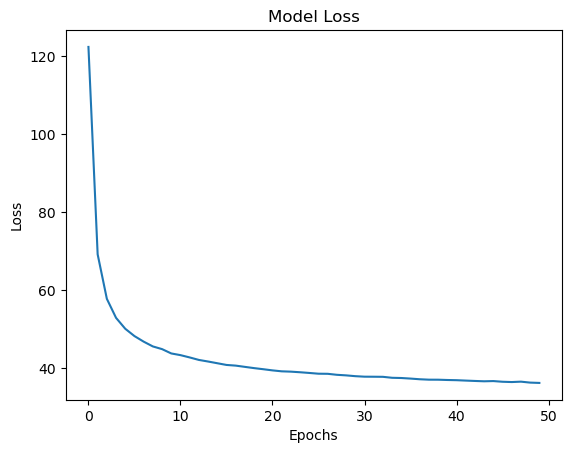

16/16 [==============================] - 0s 4ms/step
Number of images classified as blurry: 232
Number of images classified as normal: 268


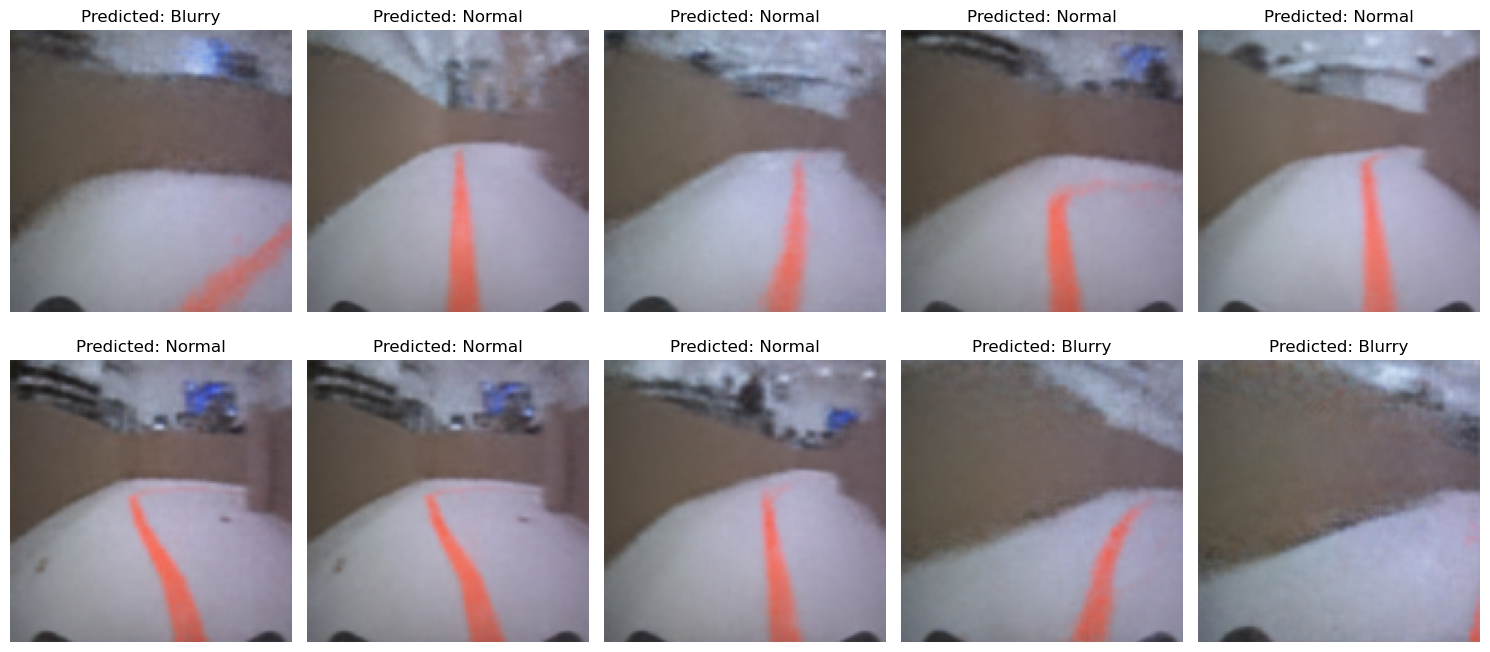

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU

# Load and preprocess images
def load_and_preprocess_images(folder_path, num_images, target_size=(128, 128)):
    images = []
    for filename in os.listdir(folder_path):
        if len(images) >= num_images:
            break
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, target_size)
            img = img / 255.0  # Normalize to [0, 1]
            images.append(img)
    return np.array(images)

# Apply motion blur to images
def apply_motion_blur(image, kernel_size=5):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel /= kernel_size
    return cv2.filter2D(image, -1, kernel)

# Preprocess images by adding motion blur
def preprocess_images_with_motion_blur(images):
    augmented_images = []
    for image in images:
        blurred_image = apply_motion_blur(image, kernel_size=5)  # Apply motion blur to all images
        augmented_images.append(blurred_image)
    return np.array(augmented_images)

normal_images = load_and_preprocess_images(normal_dir, num_images=5000)
blurry_images = load_and_preprocess_images(blurry_dir, num_images=500)

# Preprocess all images by adding motion blur
normal_with_blur = preprocess_images_with_motion_blur(normal_images)
blurry_with_blur = preprocess_images_with_motion_blur(blurry_images)

# Combine normal (with blur) and blurry images for training
train_images = np.concatenate([normal_images, normal_with_blur, blurry_with_blur], axis=0)

# Define VAE model
def create_vae(input_shape=(128, 128, 3), latent_dim=10):
    # Encoder
    inputs = layers.Input(shape=input_shape)
    
    # Encoder architecture
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)
    x = LeakyReLU(alpha=0.2)(x)
    
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)
    x = LeakyReLU(alpha=0.2)(x)

    # Flatten and Dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(128)(x)
    x = LeakyReLU(alpha=0.2)(x)

    # Latent space: z_mean and z_log_var
    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

    # Sampling layer to sample from the latent space
    def sampling(args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]  
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder: Takes the latent vector z as input
    x = layers.Dense(32 * 32 * 64, activation=None)(z)  # Dense to match the target shape
    x = layers.Reshape((32, 32, 64))(x)

    x = layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    decoded = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Define VAE model by connecting the encoder and decoder
    vae = models.Model(inputs, decoded)
    
    # Encoder model for inference (from input to latent space z)
    encoder = models.Model(inputs, z)

    # Define the VAE loss (reconstruction loss + KL divergence)
    reconstruction_loss = tf.reduce_mean(tf.reduce_sum(tf.keras.losses.mean_squared_error(inputs, decoded), axis=(1, 2)))
    kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
    
    vae.add_loss(reconstruction_loss + kl_loss)
    vae.compile(optimizer='adam')

    return vae, encoder

# Create model
vae, encoder = create_vae(input_shape=(128, 128, 3), latent_dim=10)

# Train the model
history = vae.fit(train_images, train_images, epochs=50, batch_size=32)

# Plot loss curve
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Evaluate on blurry images only (without labels)
reconstructed_images = vae.predict(blurry_images)

# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(blurry_images - reconstructed_images), axis=(1, 2, 3))

# Set a threshold for classification: blurry images should have higher reconstruction error
threshold = np.mean(reconstruction_errors)
predictions = (reconstruction_errors > threshold).astype(int)

# Print evaluation results (number of images classified as blurry or normal)
blurry_classified = np.sum(predictions == 1)
normal_classified = np.sum(predictions == 0)

print(f'Number of images classified as blurry: {blurry_classified}')
print(f'Number of images classified as normal: {normal_classified}')

# Visualize the results (show images with predicted labels)
num_images_to_show = 10  # Adjust the number of images to show
fig, axes = plt.subplots(2, num_images_to_show // 2, figsize=(15, 7))

for i in range(num_images_to_show):
    ax = axes[i // (num_images_to_show // 2), i % (num_images_to_show // 2)]
    ax.imshow(reconstructed_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {'Blurry' if predictions[i] == 1 else 'Normal'}")

plt.tight_layout()
plt.show()
